## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [3]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [4]:
gdp_df.sample(10)

,Country or Area,Year,Value,Value Footnotes
5045,Mongolia,2013,13210.094567,NaN
6948,St. Lucia,2008,21651.048100,NaN
4289,Lithuania,2021,45955.568951,NaN
1311,Central African Republic,2011,1517.148391,NaN
1218,Canada,2018,57246.020181,NaN
3253,IDA blend,2022,5707.835078,NaN
1642,CuraÃ§ao,2020,23751.617219,NaN
6208,Russia,1999,18385.464844,NaN
3015,High income,2022,56568.928246,NaN
8100,West Bank and Gaza,2010,5432.243631,NaN


5.Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita.

In [5]:
gdp_df = (
    gdp_df
    .drop(columns = "Value Footnotes") # gdp_df.drop("Value Footnotes", axis =1)
    .rename(columns={
        'Country or Area':'Country',
        'Year':'Year',
        'Value':'GDP_Per_Capita'
    })
)
gdp_df.head(1)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [6]:
num_rows, num_cols = gdp_df.shape
print(f'gdp_df has {num_rows} and {num_cols} columns')

gdp_df has 8219 and 3 columns


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [8]:
gdp_df['Year']=gdp_df['Year'].astype(str) 

gdp_df has 8219 rows and 3 columns. Data type of "Country" is object, "year" is int and "GDP_Per_Capita" is given as float. 
"Year" data type has been changed to "string".

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [9]:
gdp_df['Year'].unique() #unique years

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990'], dtype=object)

In [10]:
#gdp_df.groupby("Year")["GDP_Per_Capita"].count().plot(kind="bar")
#gdp_df['Year'].value_counts().sort_index().plot()
gdp_df['Year'].value_counts()  #no.of observations per each year

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

The number of observations per each year are between 233 to 247 and the number of observations are increased every year.

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [11]:
gdp_df['Country'].value_counts().nsmallest(1, keep ="all").index[0]  # keep="all" if there are any duplicates it keeps all the values

'Djibouti'

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.

In [12]:
gdp_2021 = gdp_df[gdp_df['Year'] == '2021'] 


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [13]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

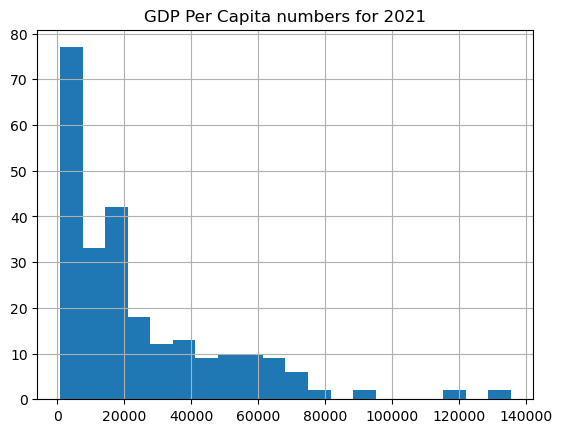

In [14]:
gdp_2021['GDP_Per_Capita'].hist(bins = 20) #.plot(kind="hist",bins=20)
plt.title('GDP Per Capita numbers for 2021');

it's kind of right skewed distribution.

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [15]:
gdp_2021.nlargest(5,'GDP_Per_Capita', keep="all") #nlargest largest value, top 5 countries as per GDP per Capita

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


In [16]:
gdp_2021.nsmallest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [17]:
#other way by using pivot_table function
#gdp_pivoted = pd.pivot_table(
   # gdp_drop_footnotes.loc[(gdp_drop_footnotes['Year']==1990) | (gdp_drop_footnotes['Year']==2021)],
    #values='GDP_Per_Capita',
    #index='Country',
    #columns='Year'
#)

In [54]:
gdp_pivoted = (
gdp_df
     [gdp_df['Year'].isin(["1990","2021"])]
    .pivot_table(index = "Country", columns="Year", values = "GDP_Per_Capita") ##pivot_table(long to wide). index -the column to use for new dataframe index, columns-The column to use for new dataframe columns, values-columns to aggregate
    .dropna(subset=["1990","2021"]) #dropna- drops rows with NaN values
)
gdp_pivoted.head()

Year,1990,2021
Country,,
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
Andorra,50036.300776,59332.202910
Angola,7391.752354,7408.126591
Antigua and Barbuda,21078.785547,25733.294827


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [22]:
gdp_pivoted.loc[:,"Percent_Change"] = 100 * (gdp_pivoted["2021"]-gdp_pivoted["1990"])/gdp_pivoted["1990"] 

In [23]:
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3386.854480,3293.797613,3135.101069,3023.988843,2993.630132,3048.085253,3133.177681,3177.467287,3155.073755,3157.384840,...,4076.020565,4074.982133,4085.879143,4088.890953,4073.880522,3861.111238,3934.287267,3974.803045,3967.860937,16.163458
Africa Western and Central,3299.401375,3250.641418,3228.263516,3106.501533,3022.456777,3006.397250,3063.322452,3115.780857,3144.167844,3112.305775,...,4817.800552,4713.515152,4709.645461,4730.823407,4774.412771,4622.731427,4698.926894,4767.383262,4814.611443,42.417559
Albania,5327.747458,3859.056862,3603.488845,3972.123929,4328.413978,4935.452220,5418.148325,4856.768289,5318.961888,6042.769898,...,13110.617881,13566.905826,14095.759046,14698.537618,15065.749573,14650.395929,16113.136519,17097.478360,17975.798395,202.438069
Algeria,11728.545729,11314.864735,11241.415417,10743.706353,10414.034824,10588.443370,10808.878867,10725.967349,11094.887537,11292.037300,...,15239.517146,15511.685877,15427.664189,15343.426122,15199.198997,14194.155748,14496.865470,14782.200297,15159.324237,23.603265
Andorra,50036.300776,47624.966857,45246.533071,42605.659583,42716.365635,44375.024724,46386.091202,50032.352913,51092.222235,52921.045261,...,62105.154239,64402.809237,63239.657771,63048.598557,63215.899792,55488.490299,59332.202910,63913.383508,64631.296391,18.578316


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [24]:
neg_percent_change =gdp_pivoted[gdp_pivoted["Percent_Change"]<0].shape[0]
neg_percent_change   # ["Percent_Change"]<0 checks if there are any negative values 
#len(neg_percent_change)

23

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2021. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [25]:
gdp_pivoted.nlargest(2,"Percent_Change")

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1122.817674,1070.827643,1390.479185,1487.812025,1672.345475,1892.116531,3033.840312,7296.100098,8684.657308,10492.464948,...,27797.79428,24435.064556,22250.438923,20165.479555,18446.591658,17089.153726,16821.448647,16932.770683,15688.238419,1398.146052
China,1645.578944,1773.639411,2001.254274,2253.052020,2518.154888,2763.799762,3006.362708,3250.614573,3472.178561,3705.977207,...,14575.93479,15485.213005,16461.069930,17490.166730,18465.298945,18833.784703,20406.729658,21011.617131,22137.599828,1140.094237


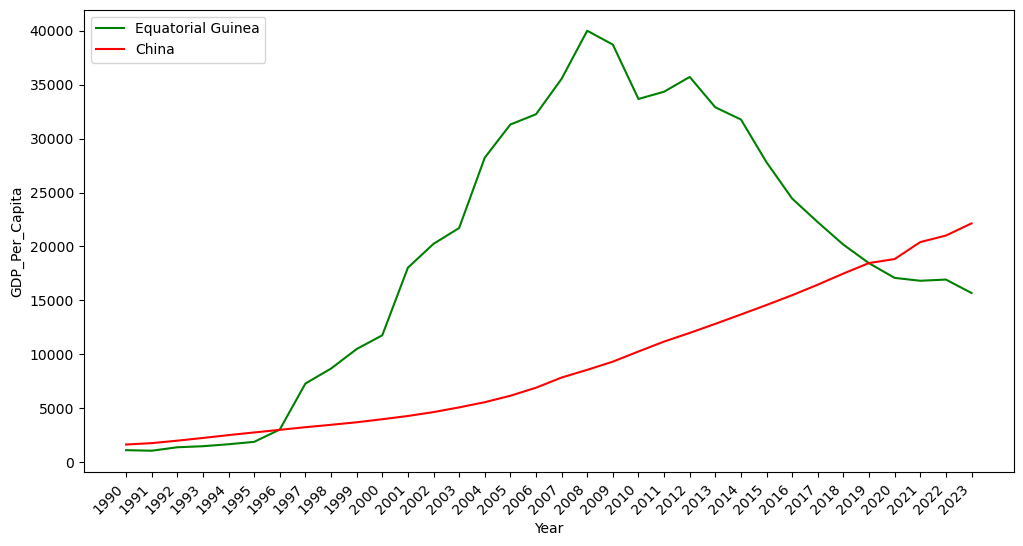

In [26]:
high_percent_change = gdp_df[gdp_df["Country"].isin(["Equatorial Guinea"])]
high_percent_change= high_percent_change.sort_values("Year",ascending = True) #sort values in ascending order 
second_high_percent_change = gdp_df[gdp_df["Country"].isin(["China"])]
second_high_percent_change = second_high_percent_change.sort_values("Year",ascending = True)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.plot(high_percent_change["Year"],high_percent_change["GDP_Per_Capita"], color ="green")
plt.plot(second_high_percent_change["Year"],second_high_percent_change["GDP_Per_Capita"], color ="red")
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")
plt.legend(["Equatorial Guinea", "China"], loc="upper left")  #legend- to provide the labels, loc argument controls the label position
plt.show();


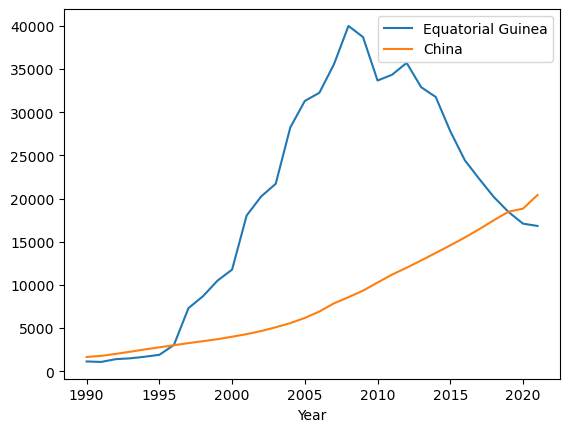

In [27]:
ax=(
gdp_df
.loc[gdp_df['Country'] == 'Equatorial Guinea']
.loc[gdp_df['Year'] <= "2021"]
.loc[gdp_df['Year'] >= "1990"]
.sort_values("Year")
.plot(x="Year", y="GDP_Per_Capita", kind="line", label = 'Equatorial Guinea')
)
(
gdp_df
.loc[gdp_df['Country'] == 'China']
.loc[gdp_df['Year'] <= "2021"]
.loc[gdp_df['Year'] >= "1990"]
.sort_values("Year")
.plot(x="Year", y="GDP_Per_Capita", kind="line", label = 'China', ax=ax)
);

In [28]:
high_percent_change_GDP = gdp_df[gdp_df["Country"].isin(["Equatorial Guinea","China"])]
high_percent_change_GDP["Year"].unique()


array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990'], dtype=object)

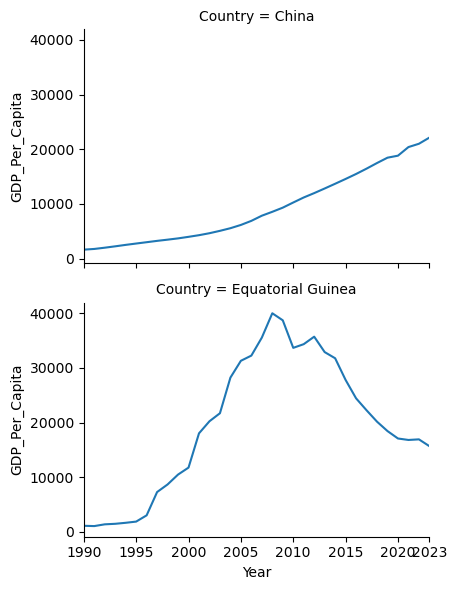

In [29]:
#used seaborn facetgrid method to compare the plots
fg = sns.FacetGrid(high_percent_change_GDP, col ="Country", col_wrap =1, aspect =1.5)          
fg.map(sns.lineplot, "Year", "GDP_Per_Capita")
fg.set(xlim =("1990", "2023"),xticks=["1990","1995","2000","2005","2010","2015","2020","2023"]);


17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [30]:
continents = pd.read_csv("../data/continents.csv")
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [31]:
gdp_df = pd.merge(gdp_df,continents, on = "Country", how ="inner")
gdp_df#merge-merges two dataframes on the common column 

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia
2,Afghanistan,2021,2144.166570,Asia
3,Afghanistan,2020,2769.685745,Asia
4,Afghanistan,2019,2927.245144,Asia
...,...,...,...,...
6258,Zimbabwe,1994,3965.730986,Africa
6259,Zimbabwe,1993,3634.750494,Africa
6260,Zimbabwe,1992,3649.891947,Africa
6261,Zimbabwe,1991,4126.405247,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

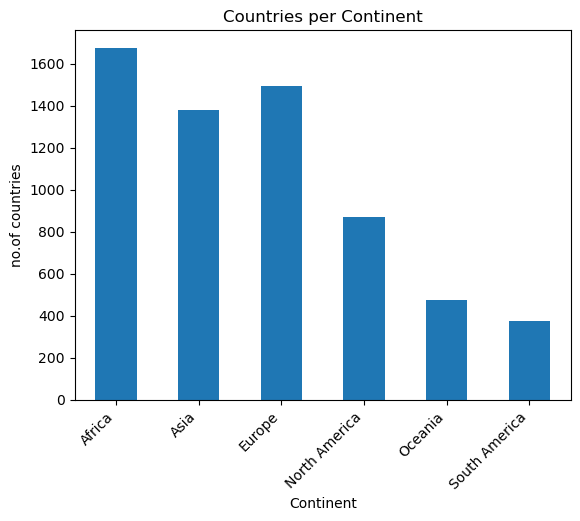

In [32]:
countries_per_continent = gdp_df.groupby("Continent")["Country"].count()
countries_per_continent.plot(kind ="bar", ylabel ="no.of countries", title = "Countries per Continent")
plt.xticks(rotation=45, ha='right')
plt.show();


20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

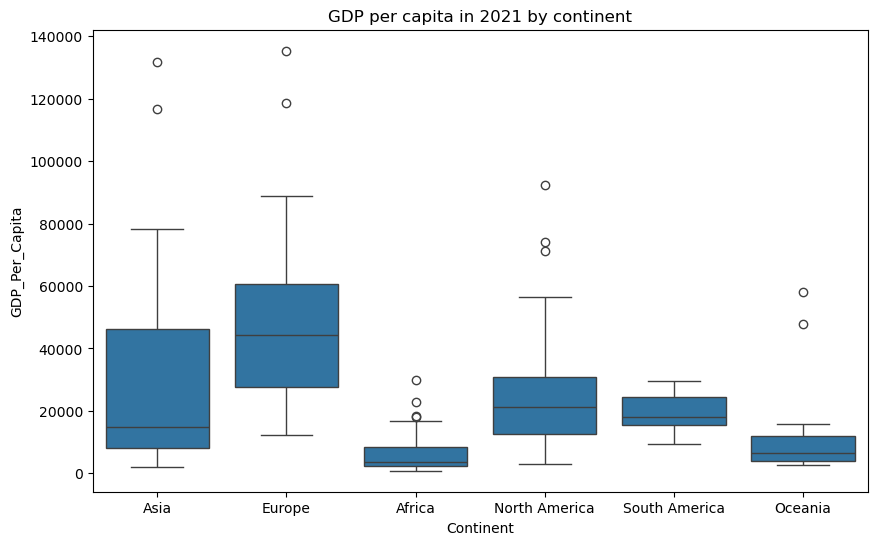

In [33]:
gdp_df_2021 = gdp_df[gdp_df["Year"] == "2021"]
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = gdp_df_2021, x="Continent", y ="GDP_Per_Capita", ax =ax)
plt.title("GDP per capita in 2021 by continent");

The average GDP per capita in 2021 is high for Europe compare to other continents and Africa has the least avg GDP per Capita.

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.
 

In [34]:
life_expectancy = pd.read_csv("../data/life_expectency.csv", skiprows = 4)
life_expectancy.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,...,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,...,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,...,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000,NaN,NaN


In [35]:
life_expectancy.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.


In [36]:
life_expectancy = life_expectancy.drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)
life_expectancy

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,66.126000,66.385000,66.744000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000,NaN,NaN
1,Africa Eastern and Southern,44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,45.765725,46.440745,46.738632,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291,NaN,NaN
2,Afghanistan,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,35.583000,36.042000,36.510000,...,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN,NaN
3,Africa Western and Central,37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,39.719248,39.529359,40.258890,...,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722,NaN,NaN
4,Angola,37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,38.258000,38.616000,38.968000,...,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,48.702000,49.883000,48.378000,50.098000,51.119000,52.003000,52.472000,53.051000,53.606000,...,76.748000,77.105000,77.117000,77.249000,74.212000,74.981000,77.623000,78.033000,NaN,NaN
262,"Yemen, Rep.",33.462000,34.058000,33.669000,33.431000,34.907000,35.592000,36.264000,37.079000,37.990000,...,67.105000,67.120000,65.915000,66.567000,66.435000,66.019000,67.952000,69.295000,NaN,NaN
263,South Africa,52.575000,53.067000,53.566000,53.895000,54.215000,54.427000,54.731000,54.955000,55.191000,...,64.749000,65.422000,65.726000,66.071000,65.150000,62.010000,65.454000,66.139000,NaN,NaN
264,Zambia,50.648000,51.041000,51.331000,51.605000,51.170000,52.079000,52.290000,52.512000,52.719000,...,61.129000,61.564000,62.138000,62.914000,63.361000,62.363000,65.279000,66.349000,NaN,NaN


In [37]:
#melt(wide to long) , id_vars argument keeps the column as it is. var_name-allows to customize the column name that holds the "variable", value_name=is a parameter used to specify the name of the new column that will contain the values from the melted columns.
life_expectancy = life_expectancy.melt(id_vars=["Country Name"],var_name="Year", value_name = "Life_Expectancy") 
life_expectancy

,Country Name,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000
...,...,...,...
17551,Kosovo,Unnamed: 69,NaN
17552,"Yemen, Rep.",Unnamed: 69,NaN
17553,South Africa,Unnamed: 69,NaN
17554,Zambia,Unnamed: 69,NaN


In [38]:
life_expectancy = life_expectancy.rename(columns = {"Country Name":"Country"})
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000
...,...,...,...
17551,Kosovo,Unnamed: 69,NaN
17552,"Yemen, Rep.",Unnamed: 69,NaN
17553,South Africa,Unnamed: 69,NaN
17554,Zambia,Unnamed: 69,NaN


23. What was the first country with a life expectancy to exceed 80?

In [39]:
first_country = life_expectancy[life_expectancy["Life_Expectancy"]>80].sort_values("Year").iloc[0] #iloc[0,0] to get only country name
first_country

Country            Monaco
Year                 1992
Life_Expectancy    80.065
Name: 8661, dtype: object

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [40]:
gdp_le = pd.merge(gdp_df, life_expectancy, on = ["Country", "Year"], how ="inner")
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2023,1992.424394,Asia,66.035
1,Afghanistan,2022,1981.710168,Asia,65.617
2,Afghanistan,2021,2144.166570,Asia,60.417
3,Afghanistan,2020,2769.685745,Asia,61.454
4,Afghanistan,2019,2927.245144,Asia,62.941


In [41]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5851,Zimbabwe,1994,3965.730986,Africa,52.537
5852,Zimbabwe,1993,3634.750494,Africa,53.976
5853,Zimbabwe,1992,3649.891947,Africa,55.602
5854,Zimbabwe,1991,4126.405247,Africa,57.037
5855,Zimbabwe,1990,4013.299059,Africa,58.319


25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [42]:
gdp_le_2021 = gdp_le[gdp_le["Year"] == "2021"]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2,Afghanistan,2021,2144.166570,Asia,60.417
26,Albania,2021,16113.136519,Europe,76.844
60,Algeria,2021,14496.865470,Africa,75.208
94,Andorra,2021,59332.202910,Europe,82.331
128,Angola,2021,7408.126591,Africa,62.958
...,...,...,...,...,...
5692,Uzbekistan,2021,9247.643827,Asia,71.681
5726,Vanuatu,2021,3135.836649,Oceania,69.952
5760,West Bank and Gaza,2021,5663.121607,Asia,73.890
5790,Zambia,2021,3503.034914,Africa,62.363


In [43]:
gdp_le_2021[gdp_le_2021["Life_Expectancy"]>=80].count().iloc[0]

np.int64(33)

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [44]:
gdp_le_2021.nlargest(3,"GDP_Per_Capita")

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
3061,Luxembourg,2021,135379.291201,Europe,82.597561
4673,Singapore,2021,131864.092336,Asia,83.092683
2434,Ireland,2021,118594.746862,Europe,82.253659


In [45]:
gdp_le_3high_GDP = gdp_le[gdp_le["Country"].isin(["Luxembourg", "Singapore", "Ireland"])]
gdp_le_3high_GDP
gdp_le_3high_GDP["Year"].unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990'], dtype=object)

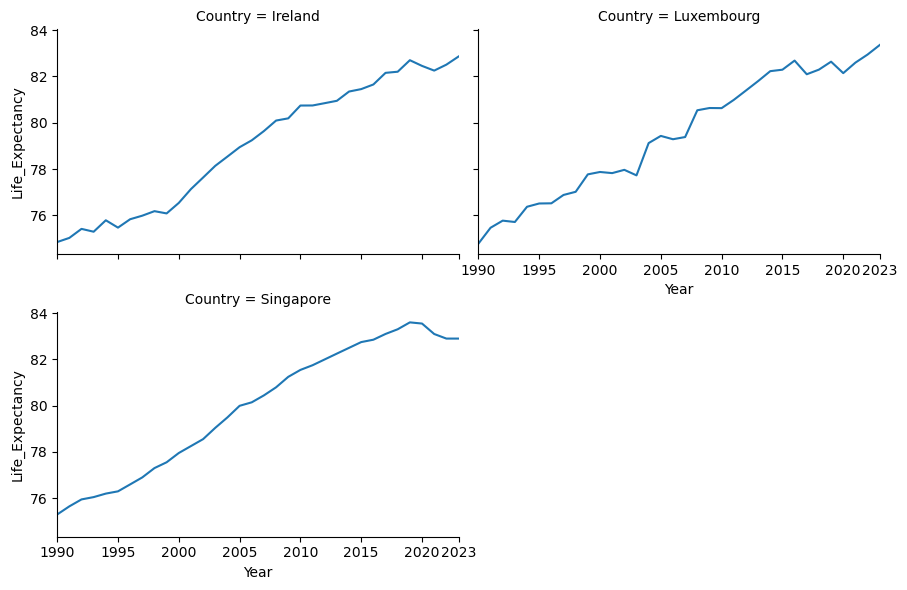

In [46]:
g = sns.FacetGrid(gdp_le_3high_GDP, col ="Country", col_wrap=2,aspect =1.5, height=3)  #facetgrid creates multiplot grid, col_wrap=arranges columns into multiple rows for better readability, col = creates seperate column of plots for each value of the specific variable
g.map(sns.lineplot, 'Year', 'Life_Expectancy')
g.set(xlim =("1990", "2023"),xticks=["1990","1995","2000","2005","2010","2015","2020","2023"]);


27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

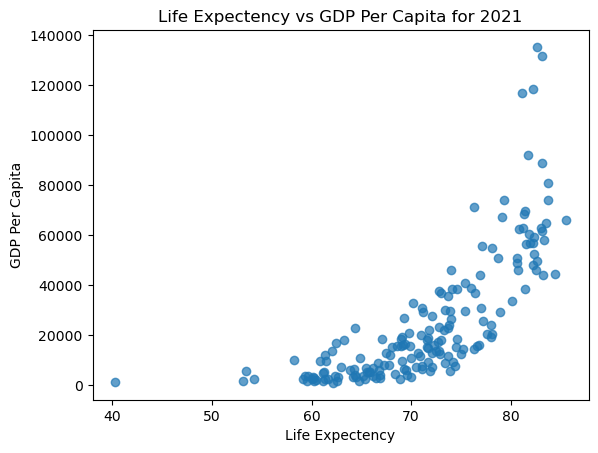

In [47]:
plt.scatter(gdp_le_2021["Life_Expectancy"], gdp_le_2021["GDP_Per_Capita"], alpha = 0.7)
plt.xlabel("Life Expectency")
plt.ylabel("GDP Per Capita")
plt.title("Life Expectency vs GDP Per Capita for 2021")
plt.show();

For the year 2021 when the Life Expectency increses the GDP per Capita is also increased.

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [48]:
gdp_le_2021["Life_Expectancy"].corr(gdp_le_2021["GDP_Per_Capita"])

np.float64(0.7527849922684222)

For the year 2021 Life Expectancy and GDP per Capita have the good positive correlation.

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [49]:
gdp_le_2021.loc[:,"log GDP_Per_Capita"] = np.log(gdp_le_2021["GDP_Per_Capita"]) 
gdp_le_2021

/var/folders/n1/v3s1h2t95hb_nmn96mg49sbm0000gn/T/ipykernel_37811/2626723899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021.loc[:,"log GDP_Per_Capita"] = np.log(gdp_le_2021["GDP_Per_Capita"])


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log GDP_Per_Capita
2,Afghanistan,2021,2144.166570,Asia,60.417,7.670506
26,Albania,2021,16113.136519,Europe,76.844,9.687390
60,Algeria,2021,14496.865470,Africa,75.208,9.581688
94,Andorra,2021,59332.202910,Europe,82.331,10.990907
128,Angola,2021,7408.126591,Africa,62.958,8.910333
...,...,...,...,...,...,...
5692,Uzbekistan,2021,9247.643827,Asia,71.681,9.132124
5726,Vanuatu,2021,3135.836649,Oceania,69.952,8.050651
5760,West Bank and Gaza,2021,5663.121607,Asia,73.890,8.641731
5790,Zambia,2021,3503.034914,Africa,62.363,8.161385


In [50]:
gdp_le_2021["Life_Expectancy"].corr(gdp_le_2021["log GDP_Per_Capita"])

np.float64(0.8490647859471865)

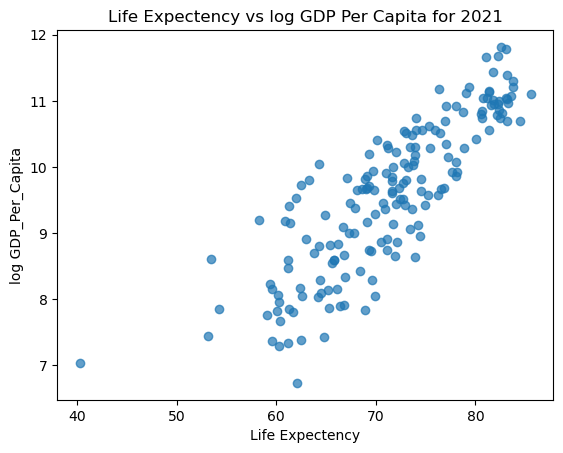

In [51]:
plt.scatter(gdp_le_2021["Life_Expectancy"], gdp_le_2021["log GDP_Per_Capita"], alpha = 0.7)
plt.xlabel("Life Expectency")
plt.ylabel("log GDP_Per_Capita")
plt.title("Life Expectency vs log GDP Per Capita for 2021")
plt.show();

* For the year 2021 Life Expectancy and log GDP per Capita are strongly correlated.
* when the life expectency increases , the log GDP per capita also incrases.
* The scatterplot for life expectency vs log GDP per capita looks linear, where as the plot for life expectency vs GDP per capita curved.

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 

2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).